In [1]:
import tempfile
import pandas as pd
from pycaret.classification import ClassificationExperiment

# Index

1. [Crear un experimento](#1---Crear-un-experimento)

    1.1 [Leer los datos](#1.1-Leer-los-datos)
    
    1.2 [Crear experimento](#1.2---Crear-experimento)

    1.3 [Resultados del experimento](#1.3---Resultados-del-experimento)
.

2. [Crear un experimento](#2---Crear-un-modelo)

    2.1 [Elegir modelo](#2.1---Elegir-modelo)
    
    2.2 [Analizar los resultados](#2.2---Analizar-los-resultados)

    2.3 [Guardar el modelo](#2.3---Guardar-el-modelo)

.

3. [Usar el modelo](#3---Usar-el-modelo)

    3.1 [Cargar el modelo](#3.1---Cargar-el-modelo)
    
    3.2 [Calcular predicciones](#3.2---Calcular-predicciones)

    3.3 [Servicio de predicción](#3.3---Servicio-de-predicción)

---

# 1 - Crear un experimento

## 1.1 Leer los datos

In [2]:
data = pd.read_csv('../data/iris.csv')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 1.2 - Crear experimento

In [3]:
experiment = ClassificationExperiment()

# Ejecutamos el experimento
experiment.setup(
    data,
    target = 'Species',
    log_experiment = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2023/05/05 17:48:19 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


## 1.3 - Resultados del experimento

In [4]:
experiment.models().head()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True


In [5]:
experiment.get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.Use GPU,params.Transformed train set shape,params.Categorical imputation,params.Fold Number,...,tags.mlflow.user,tags.Source,tags.mlflow.source.name,tags.URI,tags.mlflow.runName,tags.USI,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.Run Time,tags.Run ID
0,b493916661c64c6d8dcbe58308456b17,1,RUNNING,file:///home/adelgado/Documentos/geekshub_mlop...,2023-05-05 15:48:19.453000+00:00,None,False,"(105, 5)",mode,10,...,adelgado,setup,/home/adelgado/Documentos/geekshub_mlops/01_py...,4e459c5d,Session Initialized ddaf,None,5debc947395ec21b83fca0bec40e3221e68b581b,LOCAL,1.16,b493916661c64c6d8dcbe58308456b17


In [6]:
experiment.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7fbafafd8820>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted, po...",pred,"{'average': 'weighted', 'pos_label': 'Iris-vir...",True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted,...",pred,"{'average': 'weighted', 'pos_label': 'Iris-vir...",True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted, pos_la...",pred,"{'average': 'weighted', 'pos_label': 'Iris-vir...",True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7fbafafd8940>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7fbafafd8a60>,make_scorer(matthews_corrcoef),pred,{},True,True,False


---

## 2 - Crear el modelo

## 2.1 - Elegir modelo

In [7]:
best_model = experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.2620
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0200
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0190
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0170
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1340
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0160
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.1030
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.5410
xgboost,Extreme Gradient Boosting,0.9355,0.9868,0.9355,0.9440,0.9343,0.9023,0.9077,0.0350
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## 2.2 - Analizar los resultados

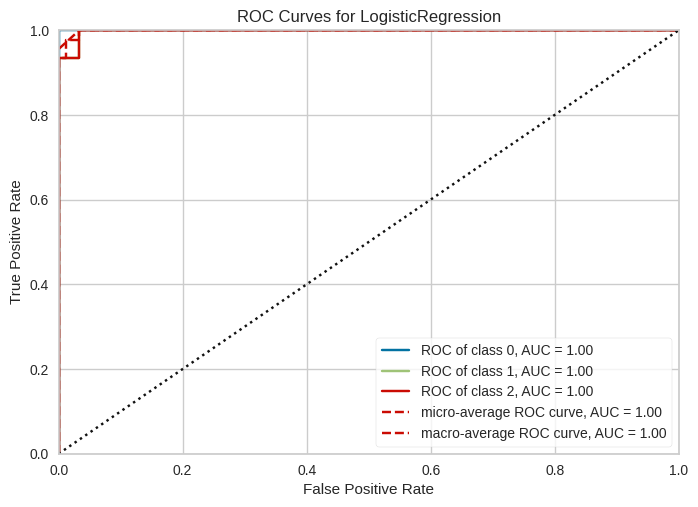

In [8]:
experiment.plot_model(best_model, plot = 'auc')

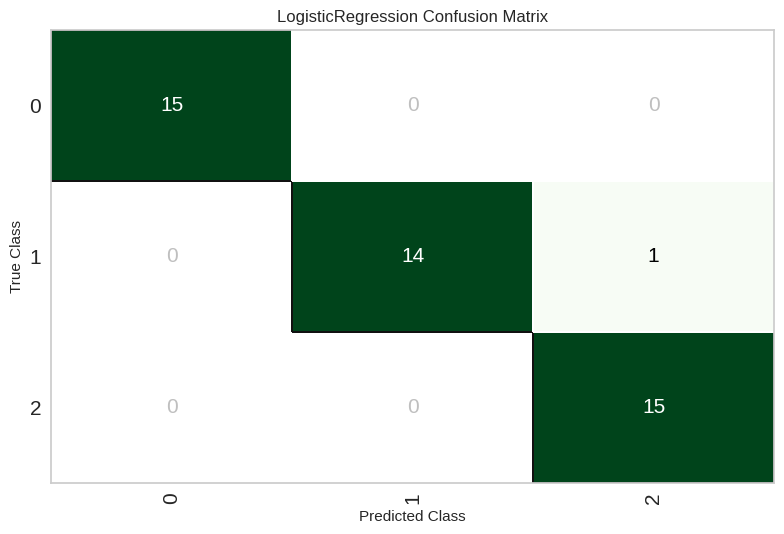

In [9]:
experiment.plot_model(best_model, plot = 'confusion_matrix')

## 2-3 Guardar el modelo

In [10]:
experiment.save_model(best_model, 'iris_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SepalLengthCm', 'SepalWidthCm',
                                              'PetalLengthCm', 'PetalWidthCm'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
             

---

# 3 - Usar el modelo

## 3.1 - Cargar el modelo

In [6]:
experiment = ClassificationExperiment()

experiment.setup(
    data.drop('SepalWidthCm', axis=1),
    target = 'Species',
    log_experiment = True,
    session_id = 123)

model = experiment.load_model('iris_model')

,Description,Value
0,Session id,123
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 4)"
5,Transformed data shape,"(150, 4)"
6,Transformed train set shape,"(105, 4)"
7,Transformed test set shape,"(45, 4)"
8,Numeric features,3
9,Preprocess,True


Transformation Pipeline and Model Successfully Loaded


## 3.2 - Calcular predicciones 

In [7]:
pred = experiment.predict_model(model, data)
pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9733,0.9983,0,0,0,0.9600,0.9603


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,0.9775
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,0.9678
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0.9820
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0.9719
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0.9813
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,0.9104
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.7621
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.8372
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,0.9426


In [5]:
file = experiment.check_drift(
    reference_data = data.head(100),
    current_data = data.tail(100),
    target = 'Species')

## 3.3 - Servicio de predicción

In [ ]:
with tempfile.TemporaryDirectory() as tmpdirname:
    experiment.create_api(model, f"{tmpdirname}/iris_api")
    file = f"{tmpdirname}/iris_api.py"
    !python {file}

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python /tmp/tmpcnotf5cp/iris_api.py
Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [309296]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:57390 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:57390 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:57390 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:57390 - "GET /openapi.json HTTP/1.1" 200 OK
